标量由只有一个元素的张量表示

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x-y, x*y, x/y, x**y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

可以将向量视为标量值组成的列表

In [2]:
x = torch.arange(4)
x,x[3],len(x),x.shape

(tensor([0, 1, 2, 3]), tensor(3), 4, torch.Size([4]))

通过两个分量m和n来创建形状为 m x n 的矩阵

In [3]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置

In [4]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

对称矩阵（symmetric matrix） A=AT

In [5]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [6]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

就像是向量是标量的推广，矩阵是向量的推广，我们可以构造更多轴的数据

In [7]:
x = torch.arange(24).reshape(2,3,4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

给定具有相同形状的任何两个张量，任何元素的二元运算的结果都是相同形状的张量

In [8]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
print("A:",A)

B = A.clone() #通过分配新内存，将A的副本分给B
print("B:",B)

print("A+B:",A+B)

A: tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
B: tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
A+B: tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])


两个矩阵按元素乘法称为 哈达玛积（Hadamard product）

In [9]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [10]:
a = 2
x = torch.arange(24).reshape(2,3,4)

a+x,a*x,(a*x).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 torch.Size([2, 3, 4]))

计算元素之和

In [11]:
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [12]:
A = torch.arange(40).reshape(2,5,4)
A.shape, A.sum()

(torch.Size([2, 5, 4]), tensor(780))

指定求和汇总张量轴

In [13]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([[20, 22, 24, 26],
         [28, 30, 32, 34],
         [36, 38, 40, 42],
         [44, 46, 48, 50],
         [52, 54, 56, 58]]),
 torch.Size([5, 4]))

In [14]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([[ 40,  45,  50,  55],
         [140, 145, 150, 155]]),
 torch.Size([2, 4]))

In [15]:
A_sum_axis2 = A.sum(axis=2)
A_sum_axis2, A_sum_axis2.shape

(tensor([[  6,  22,  38,  54,  70],
         [ 86, 102, 118, 134, 150]]),
 torch.Size([2, 5]))

In [16]:
A.sum()

tensor(780)

In [17]:
A.float().mean(), A.sum() / A.numel()

(tensor(19.5000), tensor(19.5000))

In [18]:
A.float().mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

计算总和或者均值保持轴数不变

In [19]:
sum_A = A.sum(axis=1,keepdims=True)
A.shape, sum_A.shape, sum_A

(torch.Size([2, 5, 4]),
 torch.Size([2, 1, 4]),
 tensor([[[ 40,  45,  50,  55]],
 
         [[140, 145, 150, 155]]]))

通过广播，将A除以sum_A

In [20]:
A/sum_A

tensor([[[0.0000, 0.0222, 0.0400, 0.0545],
         [0.1000, 0.1111, 0.1200, 0.1273],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.3000, 0.2889, 0.2800, 0.2727],
         [0.4000, 0.3778, 0.3600, 0.3455]],

        [[0.1429, 0.1448, 0.1467, 0.1484],
         [0.1714, 0.1724, 0.1733, 0.1742],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.2286, 0.2276, 0.2267, 0.2258],
         [0.2571, 0.2552, 0.2533, 0.2516]]])

某个轴计算A元素的累积总和

In [21]:
A.cumsum(axis=0)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]],

        [[20, 22, 24, 26],
         [28, 30, 32, 34],
         [36, 38, 40, 42],
         [44, 46, 48, 50],
         [52, 54, 56, 58]]])

In [22]:
A.cumsum(axis=0).shape

torch.Size([2, 5, 4])

点积是相同位置的按元素乘积的和

In [23]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

也可以通过按元素的乘法，然后求和表示两个向量的点积

In [24]:
x*y, torch.sum(x*y)

(tensor([0., 1., 2., 3.]), tensor(6.))

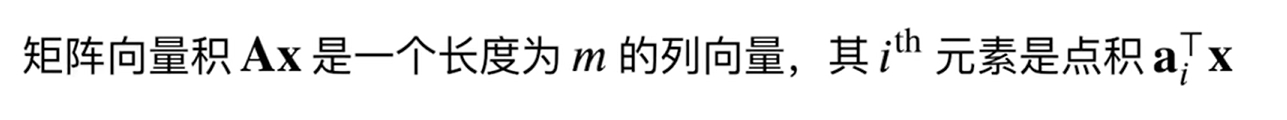

mv: Matrix Vector Multiplication

In [25]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
x = torch.arange(4, dtype=torch.float32)
A,x,A.shape, x.shape, torch.mv(A,x), torch.mv(A,x).shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]),
 torch.Size([5]))

把矩阵-矩阵乘法AB看作简单地执行m次矩阵-向量积，并将结果拼接在一起，形成一个n x m的矩阵

In [26]:
B = torch.ones(4,3)
A,B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [27]:
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

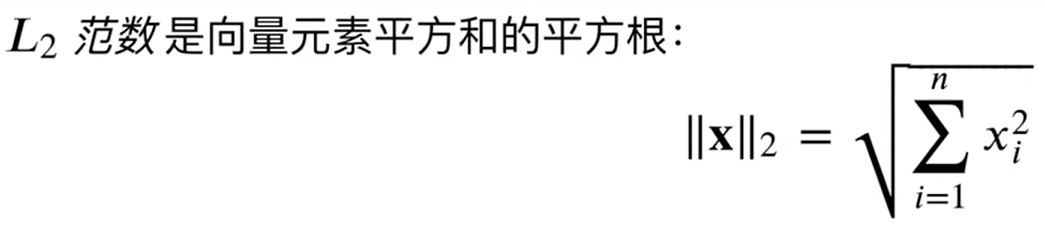

In [28]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

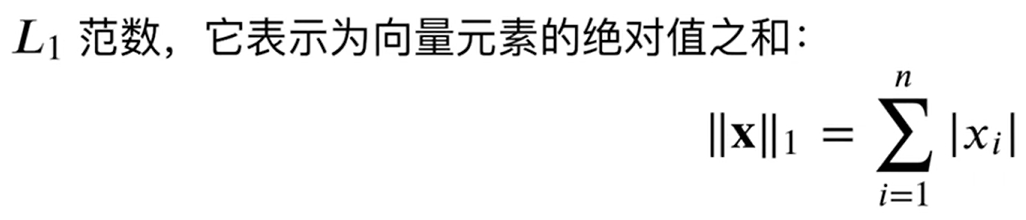

In [29]:
torch.abs(u).sum()

tensor(7.)

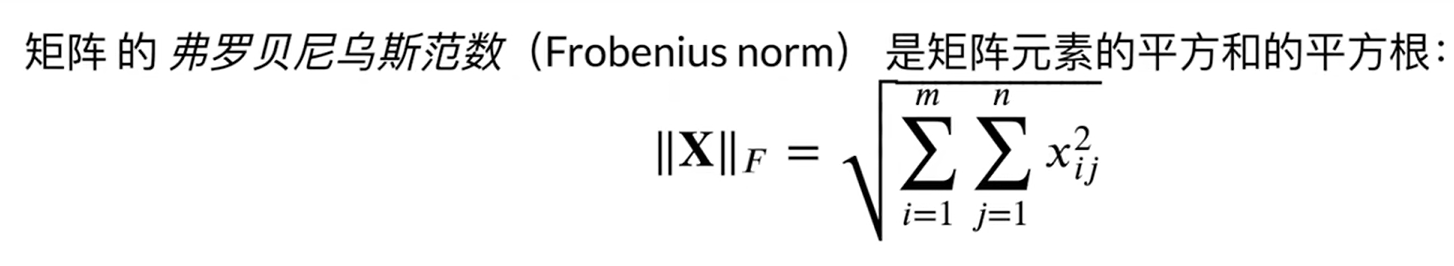

In [30]:
torch.norm(torch.ones((4,9)))

tensor(6.)

In [31]:
import torch

In [32]:
a = torch.ones((2,5,4))
a

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [33]:
a.sum().shape

torch.Size([])

In [34]:
a.sum(axis=1)

tensor([[5., 5., 5., 5.],
        [5., 5., 5., 5.]])

In [35]:
a.sum(axis=1).shape

torch.Size([2, 4])

In [36]:
a.sum(axis=0)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [ ]:
a.sum(axis=0)